In [122]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, accuracy_score

In [123]:
def run_logistic_regression(features, lables):
    X_train, X_test, y_train, y_test = train_test_split(features, lables, test_size=0.20)
    pipe = Pipeline([('scaler', StandardScaler()), ('log', LogisticRegression())])
    pipe.fit(X_train, y_train)
    return pipe.score(X_test, y_test)

def run_multiple_log_regression(features, labels, iterations=25):
    average = 0
    for i in range(iterations):
        average = average + run_logistic_regression(features, labels)
    return average/iterations

In [124]:
about_tesla_data = pd.read_csv("labeled_daily_all_tesla_tweets.csv", index_col=0, parse_dates=True)
prev_tweet_data = pd.read_csv("prev_day_dataset.csv", index_col=0, parse_dates=True)
about_elon_data = pd.read_csv("labeled_daily_all_elon_musk_tweets.csv", index_col=0, parse_dates=True)
from_elon_data = pd.read_csv("labeled_daily_from_elon_musk_tweets.csv", index_col=0, parse_dates=True)
from_tesla_data = pd.read_csv("labeled_daily_from_tesla_tweets.csv", index_col=0, parse_dates=True)

from_elon_data = from_elon_data[[x for x in from_elon_data.columns if 'user' not in x]]
from_tesla_data = from_tesla_data[[x for x in from_tesla_data.columns if 'user' not in x]]

choice = about_tesla_data
# 756 is start of 2016 for about tesla and about elon data
# 334 is start of 2016 for from_elon_data
# 787 is the start of 2016 for from_tesla_data

keys = choice.keys().to_numpy()

array = choice.to_numpy()
tweet_data2 = array[756: ]

df = pd.DataFrame(tweet_data2, columns=keys)
tweet_data = df

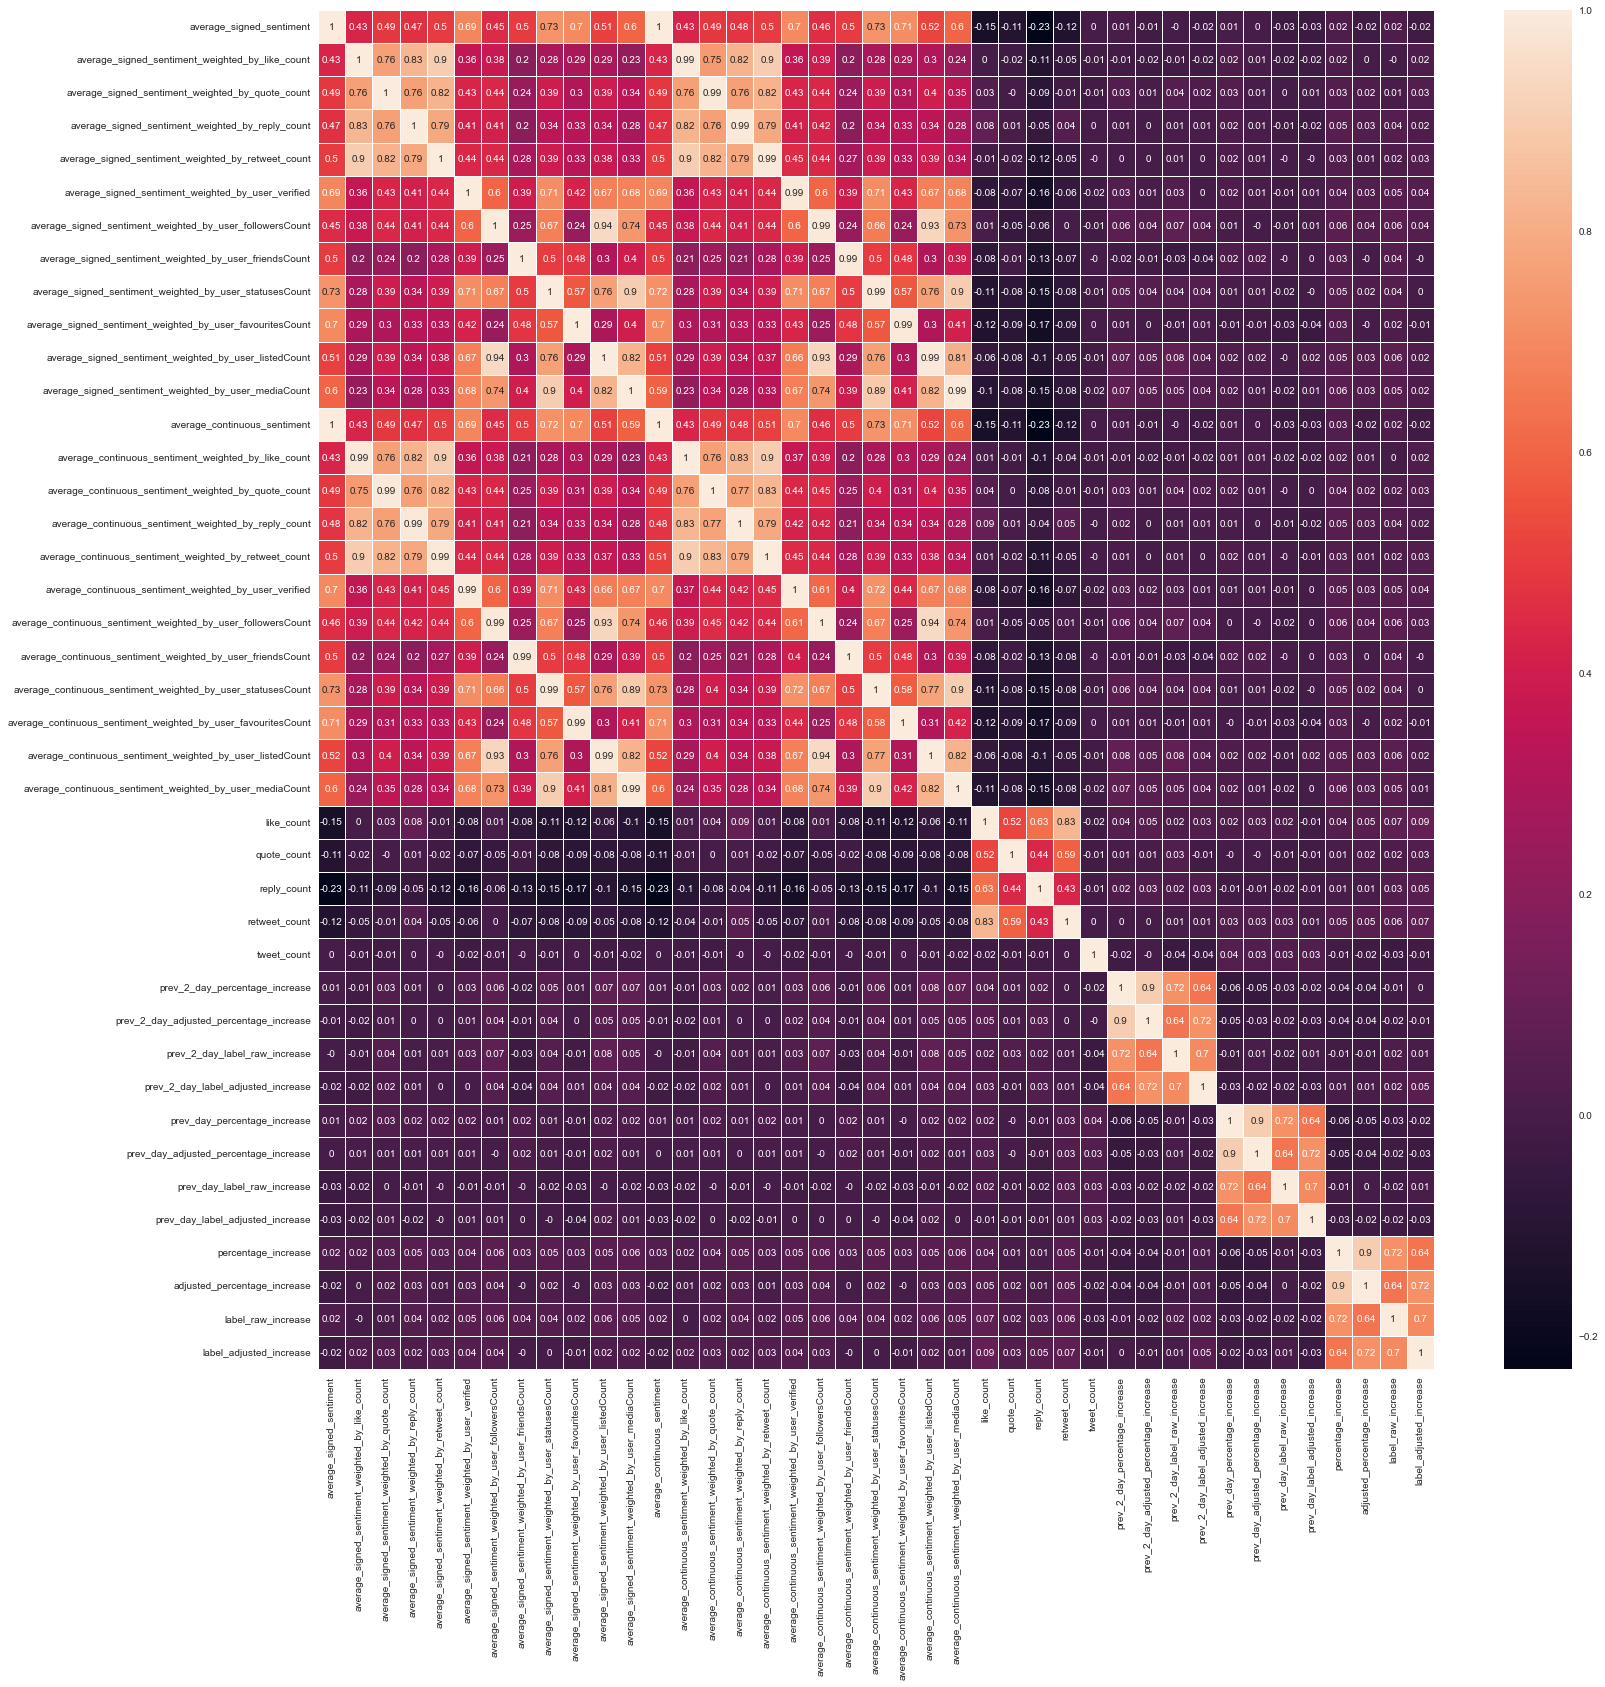

In [125]:
plt.style.use("seaborn")
plt.pyplot.figure(figsize=(25,25))

# 3. Plot the heatmap
correlation = tweet_data.corr().applymap(lambda x: round(x, 2))

heat_map = sns.heatmap(correlation, annot=True, linewidth = 1)


In [126]:
feature_cols = tweet_data.keys()

feature_matrix = tweet_data[feature_cols[0:-4]]
average = np.average(feature_matrix, axis=0)
variance = np.std(feature_matrix, axis=0)
scaled_matrix = (feature_matrix-average)/variance

In [127]:
X = scaled_matrix
y = tweet_data['label_raw_increase']

average = 0
total = 100
for i in range(total):
    average = average + run_logistic_regression(X, y)

print(average/total)

c:\users\ethan\onedrive - vanderbilt\documents\3rd year sem 2\cs 4262 machine learning\jupyter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\ethan\onedrive - vanderbilt\documents\3rd year sem 2\cs 4262 machine learning\jupyter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also 

0.5062460567823344


c:\users\ethan\onedrive - vanderbilt\documents\3rd year sem 2\cs 4262 machine learning\jupyter\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(0.5, 1.0, 'F1 for each variable')]

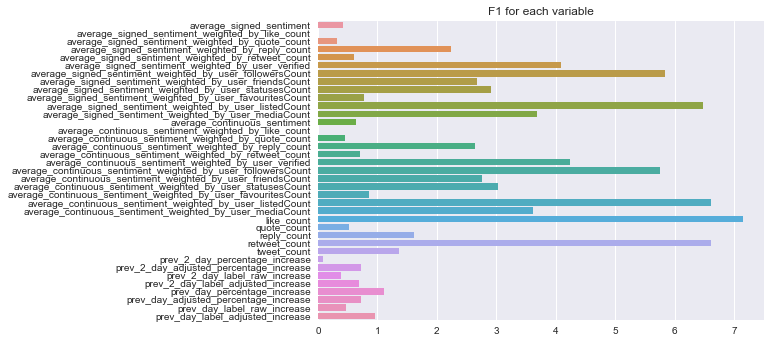

In [128]:
F_values = f_classif(X, y)

#result2 = SelectKBest(f_regression, k=10).fit_transform(X, y)
keys = tweet_data.keys().to_numpy()[0:-4]
values = np.reshape(F_values[0], newshape=(len(keys),))
#df = pd.DataFrame(values, columns=keys)
#print(keys)

highest_features = ['average_continuous_sentiment_weighted_by_quote_count', 'like_count', 'retweet_count', 'prev_2_day_label_adjusted_increase']

sns.barplot(y=keys, x=values).set(title='F1 for each variable')

[Text(0.5, 1.0, 'P value for each F1')]

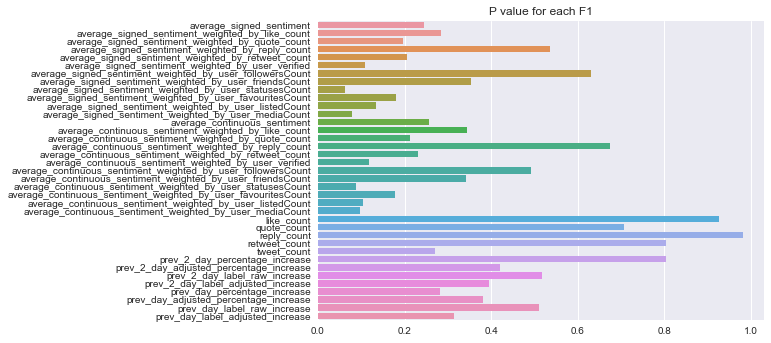

In [73]:
sns.barplot(y=keys, x=F_values[1]).set(title='P value for each F1')

In [129]:
num_good_features = 8

X_good = SelectKBest(f_classif, k=num_good_features).fit_transform(X, y)
X_good

array([[-0.40251609, -0.03119921, -0.23098544, ..., -0.23424269,
        -0.49350662, -0.33128941],
       [ 2.07275035,  1.67083578,  1.88657675, ...,  1.84088356,
        -0.49330411, -0.4360338 ],
       [ 1.30238526,  0.79714326,  1.16949978, ...,  1.12158757,
        -0.49978435, -0.41045668],
       ...,
       [-2.08318453, -1.65719591, -1.80180527, ..., -1.78659985,
         1.2345694 ,  2.81652325],
       [ 0.42307853,  0.76397725,  0.51054355, ...,  0.48747804,
        -0.00862308, -0.14707325],
       [-1.40653176, -1.04522257, -1.05361615, ..., -1.07442325,
         0.02454762,  0.23414763]])

In [130]:
X

,average_signed_sentiment,average_signed_sentiment_weighted_by_like_count,average_signed_sentiment_weighted_by_quote_count,average_signed_sentiment_weighted_by_reply_count,average_signed_sentiment_weighted_by_retweet_count,average_signed_sentiment_weighted_by_user_verified,average_signed_sentiment_weighted_by_user_followersCount,average_signed_sentiment_weighted_by_user_friendsCount,average_signed_sentiment_weighted_by_user_statusesCount,average_signed_sentiment_weighted_by_user_favouritesCount,...,retweet_count,tweet_count,prev_2_day_percentage_increase,prev_2_day_adjusted_percentage_increase,prev_2_day_label_raw_increase,prev_2_day_label_adjusted_increase,prev_day_percentage_increase,prev_day_adjusted_percentage_increase,prev_day_label_raw_increase,prev_day_label_adjusted_increase
0,-0.186866,0.249495,-0.024860,0.452172,0.837275,-0.402516,-0.031199,-0.799212,0.068438,-0.510821,...,-0.331289,0.577367,0.189548,0.470452,0.988069,0.993075,0.188344,0.065972,0.988069,0.993075
1,1.760240,-0.730922,0.833982,-1.368508,0.428490,2.072750,1.670836,1.941830,1.503111,1.947328,...,-0.436034,0.577367,0.189251,0.066333,0.988069,0.993075,-1.132650,-1.088169,-1.012075,-1.006973
2,2.379072,1.473701,-1.689950,1.963238,1.650764,1.302385,0.797143,1.487865,2.265420,1.490429,...,-0.410457,0.071852,-1.132587,-1.088103,-1.012075,-1.006973,-0.480736,-0.409722,-1.012075,-1.006973
3,0.648297,0.793100,0.343519,1.275181,0.499763,1.717060,0.143877,-1.696182,0.178500,-0.854267,...,-0.379703,0.240357,-0.480257,-0.409483,-1.012075,-1.006973,-0.182244,0.183030,-1.012075,0.993075
4,1.712068,1.462956,0.812733,1.829284,1.179755,1.948735,1.410309,1.242905,1.032657,2.099081,...,-0.409239,0.408862,-0.181573,0.183419,-1.012075,0.993075,0.206689,0.266706,0.988069,0.993075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,0.688309,0.159173,0.227421,-0.459965,-0.620351,-1.467169,-0.693580,-0.208423,0.182734,1.118906,...,0.174163,0.240357,-0.928249,-0.628096,-1.012075,-1.006973,0.130544,0.331748,0.988069,0.993075
1579,-1.066833,-1.548866,-1.025042,-1.338838,-1.264726,-1.176278,-1.539126,-1.148282,-0.905688,-0.438044,...,-0.088002,-0.770675,0.131415,0.332176,0.988069,0.993075,-0.621352,-1.248211,-1.012075,-1.006973
1580,-0.839580,-2.303891,-2.113513,-2.324632,-2.487796,-2.083185,-1.657196,-0.551782,-1.637548,-0.279789,...,2.816523,0.240357,-0.620962,-1.248185,-1.012075,-1.006973,-0.189053,0.436581,-1.012075,0.993075
1581,0.927309,0.693353,1.062142,1.257828,0.732576,0.423079,0.763977,-0.091900,0.818232,0.505984,...,-0.147073,0.240357,-0.188387,0.437035,-1.012075,0.993075,-0.403205,-0.033170,-1.012075,-1.006973


In [131]:
print(run_multiple_log_regression(X_good, y, iterations=100))

0.5157097791798108


In [132]:
from keras.datasets import imdb
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
import keras_tuner as kt

In [133]:
def model_builder(hp):

    model = keras.Sequential()
    #model.add(keras.layers.Flatten(input_shape=(37, )))

    inputs = keras.Input(shape=(37,), name="input1")
    model.add(inputs)

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    #hp_units2 = hp.Int('units2', min_value=32, max_value=512, step=32)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    #model.add(keras.layers.Dense(units=hp_units2, activation='relu'))
    model.add(keras.layers.Dense(1, activation="sigmoid", name="predictions"))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss=tf.keras.losses.BinaryCrossentropy(),
                    metrics=[tf.keras.metrics.BinaryAccuracy()])
    return model

def create_model(features, hidden_size=100, learning_rate=0.01):

    model = tf.keras.Sequential()

    model.add(keras.Input(shape=(features.shape[1],), name="input1"))
    model.add(keras.layers.Dense(hidden_size, activation="relu", name="dense_1"))
    model.add(keras.layers.Dense(1, activation="sigmoid", name="predictions"))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()]
    )
    return model

def run_model(features, labels, epochs=100, batch_size=100, iterations=10, hidden=100, l_rate = 0.01):

    average = np.average(features, axis=0)
    variance = np.std(features, axis=0)
    scaled_matrix = (features-average)/variance

    average = 0
    best_model = None
    cur_accuracy = -1
    best_history = None

    for i in range(iterations):

        X_train, X_test, y_train, y_test = train_test_split(scaled_matrix, labels, test_size=0.20, stratify=labels)

        model = create_model(features, hidden_size=hidden, learning_rate=l_rate)

        history = model.fit(
            X_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_test, y_test),
        )

        array = history.history['val_binary_accuracy']
        average = average + array[len(array)-1]
        if array[len(array)-1] > cur_accuracy:
            best_model = model
            cur_accuracy = array[len(array)-1]
            best_history = history


    return average/iterations, best_history, best_model

In [105]:
# With The Highest features, we got 53.3%

X_train, X_final_test, y_train, y_final_test = train_test_split(X, y, test_size=0.20)

accuracy, history, model = run_model(X_train, y_train, epochs=55, batch_size=5, iterations=25, hidden=320, l_rate=0.01)
model.summary()
prediction = np.round(model.predict(X_final_test), 0)
print("ACCURACY:", accuracy)
print(confusion_matrix(y_final_test, prediction))


Epoch 1/55
203/203 [==============================] - 1s 2ms/step - loss: 0.7934 - binary_accuracy: 0.5401 - val_loss: 0.7788 - val_binary_accuracy: 0.5020
Epoch 2/55
203/203 [==============================] - 0s 2ms/step - loss: 0.7369 - binary_accuracy: 0.5213 - val_loss: 0.8618 - val_binary_accuracy: 0.4625
Epoch 3/55
203/203 [==============================] - 0s 2ms/step - loss: 0.7410 - binary_accuracy: 0.5361 - val_loss: 0.8230 - val_binary_accuracy: 0.4625
Epoch 4/55
203/203 [==============================] - 0s 2ms/step - loss: 0.7272 - binary_accuracy: 0.5351 - val_loss: 0.7505 - val_binary_accuracy: 0.5020
Epoch 5/55
203/203 [==============================] - 0s 2ms/step - loss: 0.7321 - binary_accuracy: 0.5549 - val_loss: 0.9328 - val_binary_accuracy: 0.4664
Epoch 6/55
203/203 [==============================] - 0s 2ms/step - loss: 0.7499 - binary_accuracy: 0.5509 - val_loss: 0.7886 - val_binary_accuracy: 0.4822
Epoch 7/55
203/203 [==============================] - 0s 2ms/ste

In [24]:
model = create_model(X_train, hidden_size=320, learning_rate=0.01)

history = model.fit(
    X_train,
    y_train,
    batch_size=5,
    epochs=50,
    validation_data=(X_final_test, y_final_test),
)

print(history.history)
prediction = np.round(model.predict(X_final_test), 0)
print(confusion_matrix(y_final_test, prediction))

Epoch 1/50
127/127 [==============================] - 1s 3ms/step - loss: 0.7246 - binary_accuracy: 0.5047 - val_loss: 0.6887 - val_binary_accuracy: 0.5786
Epoch 2/50
127/127 [==============================] - 0s 2ms/step - loss: 0.6967 - binary_accuracy: 0.5331 - val_loss: 0.6868 - val_binary_accuracy: 0.5031
Epoch 3/50
127/127 [==============================] - 0s 2ms/step - loss: 0.6983 - binary_accuracy: 0.5110 - val_loss: 0.6895 - val_binary_accuracy: 0.5409
Epoch 4/50
127/127 [==============================] - 0s 1ms/step - loss: 0.6909 - binary_accuracy: 0.5221 - val_loss: 0.7003 - val_binary_accuracy: 0.5094
Epoch 5/50
127/127 [==============================] - 0s 1ms/step - loss: 0.6836 - binary_accuracy: 0.5126 - val_loss: 0.6979 - val_binary_accuracy: 0.5346
Epoch 6/50
127/127 [==============================] - 0s 1ms/step - loss: 0.6908 - binary_accuracy: 0.5394 - val_loss: 0.7088 - val_binary_accuracy: 0.5094
Epoch 7/50
127/127 [==============================] - 0s 2ms/ste

In [137]:
#accuracy, history, model = run_model(X, y, epochs=100, batch_size=40, iterations=10, hidden=150)

# TODO: Change between X and X_good
X_train, X_final_test, y_train, y_final_test = train_test_split(X_good, y, test_size=0.20, stratify=y)

max = -1 # 52.3
optimal_hidden = 50 # 90
best_model = None
all_data = []
for i in range(128, 320, 32):
    accuracy, history, model = run_model(X_train, y_train, epochs=10, batch_size=30, iterations=10, hidden=i)
    if accuracy > max:
        max = accuracy
        optimal_hidden = i
        best_model = model
    all_data.append((i, accuracy))

prediction = np.round(best_model.predict(X_final_test), 0)
best_model.summary()
print("ACCURACY:", max)
print("OPTIMAL HIDDEN: ", optimal_hidden)
print(confusion_matrix(y_final_test, prediction))
print(f1_score(y_final_test, prediction, average="macro"))
print(accuracy_score(y_final_test, prediction))
print(history.history)

Epoch 1/10
34/34 [==============================] - 0s 5ms/step - loss: 0.7139 - binary_accuracy: 0.5217 - val_loss: 0.6944 - val_binary_accuracy: 0.4843
Epoch 2/10
34/34 [==============================] - 0s 2ms/step - loss: 0.6932 - binary_accuracy: 0.5168 - val_loss: 0.7064 - val_binary_accuracy: 0.4921
Epoch 3/10
34/34 [==============================] - 0s 2ms/step - loss: 0.6932 - binary_accuracy: 0.5168 - val_loss: 0.6957 - val_binary_accuracy: 0.5276
Epoch 4/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6860 - binary_accuracy: 0.5534 - val_loss: 0.7039 - val_binary_accuracy: 0.5079
Epoch 5/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6861 - binary_accuracy: 0.5455 - val_loss: 0.6960 - val_binary_accuracy: 0.4961
Epoch 6/10
34/34 [==============================] - 0s 4ms/step - loss: 0.6846 - binary_accuracy: 0.5534 - val_loss: 0.7008 - val_binary_accuracy: 0.5000
Epoch 7/10
34/34 [==============================] - 0s 4ms/step - loss: 0.68

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

tuner = kt.Hyperband(model_builder,
                     objective='val_binary_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='Choosing Input Layers',
                     project_name='Twitter Project 3')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 01s]
val_binary_accuracy: 0.5533596873283386

Best val_binary_accuracy So Far: 0.5770751237869263
Total elapsed time: 00h 00m 28s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 320 and the optimal learning rate for the optimizer
is 0.01.



In [33]:
best_hps.values

{'units': 128,
 'learning_rate': 0.01,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0015'}